In [80]:
import pandas as pd
from urllib.request import urlopen
import json
from tensorflow import keras
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Get historical data from the NASA POWER PROJECT API
##### Data is collected from: 1st Jan 2012 through 19th March 2022

In [82]:
url = "https://power.larc.nasa.gov/api/temporal/daily/point?start=20120101&end=20220319&latitude=-1.5177&longitude=37.2634&parameters=T2M,PS,WS10M,PRECTOTCORR,QV2M&community=AG&format=csv"

csv_path = keras.utils.get_file(fname="machakos-county-2012-2022.csv", origin=url)

147456/135031 [================================] - 1s 4us/step


In [83]:
def parse_date(x):
    return datetime.strptime(x, '%Y %j')

In [85]:
# Skip the CSV description rows
df = pd.read_csv(csv_path, skiprows=13, parse_dates={'date': ['YEAR', 'DOY']}, date_parser=parse_date, skipinitialspace=True, index_col=0)

In [86]:
df['T2M']

date
2012-01-01     19.01
2012-01-02     19.31
2012-01-03     20.82
2012-01-04     21.26
2012-01-05     21.69
               ...  
2022-03-15     23.58
2022-03-16     24.25
2022-03-17     23.58
2022-03-18   -999.00
2022-03-19   -999.00
Name: T2M, Length: 3731, dtype: float64

In [87]:
# Get column names
df.columns

Index(['T2M', 'PS', 'WS10M', 'PRECTOTCORR', 'QV2M'], dtype='object')

In [88]:
titles = ["Temperature at 2 Meters (C)", "Surface Pressure (kPa)", "Wind Speed at 10 Meters (m/s)", "Precipitation Corrected (mm/day)"]
feature_keys = ["T2M", "PS", "WS10M", "PRECTOTCORR"]
date_time_key = ["date"]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

In [89]:
# Remove empty values
indexes_to_drop = df.index[df['T2M'] == -999.00]
df.drop(indexes_to_drop, inplace=True)

In [90]:
df.columns

Index(['T2M', 'PS', 'WS10M', 'PRECTOTCORR', 'QV2M'], dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3729 entries, 2012-01-01 to 2022-03-17
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T2M          3729 non-null   float64
 1   PS           3729 non-null   float64
 2   WS10M        3729 non-null   float64
 3   PRECTOTCORR  3729 non-null   float64
 4   QV2M         3729 non-null   float64
dtypes: float64(5)
memory usage: 174.8 KB


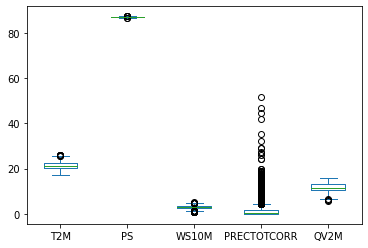

In [92]:
# Box plot
df.plot.box()

plt.savefig("Box plot", dpi=1200)


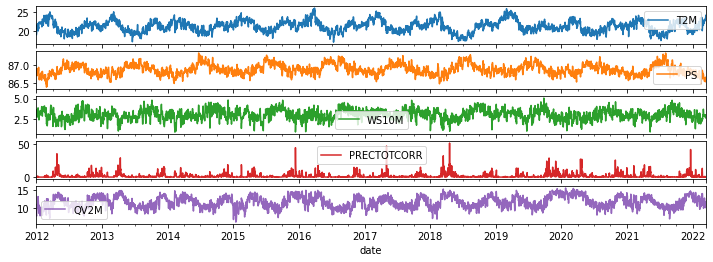

In [93]:
# Visualize trends
df.plot.line(figsize=(12, 4), subplots=True)
plt.savefig("Sub plot", dpi=1200)

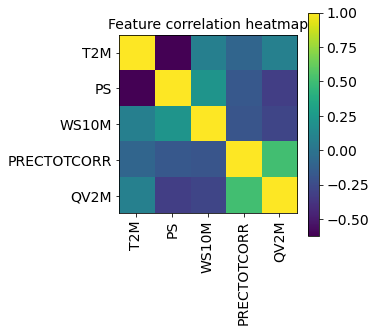

In [94]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature correlation heatmap", fontsize=14)
    plt.show()

show_heatmap(df)

In [95]:
correlation = df.corr()
print(correlation['PRECTOTCORR'].sort_values(ascending = False),'\n')

PRECTOTCORR    1.000000
QV2M           0.509150
T2M           -0.094317
PS            -0.172992
WS10M         -0.189735
Name: PRECTOTCORR, dtype: float64 



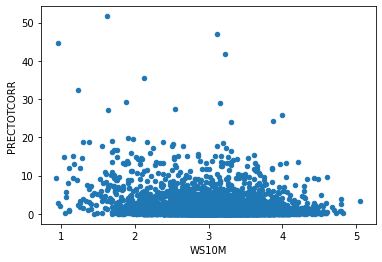

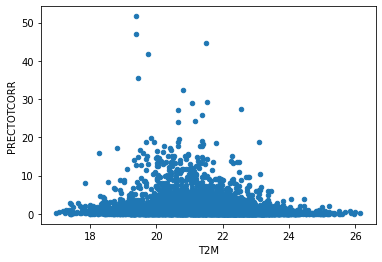

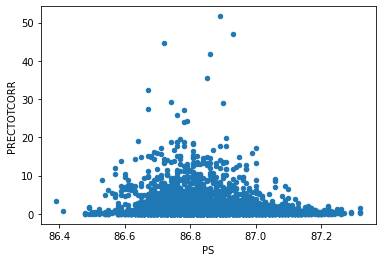

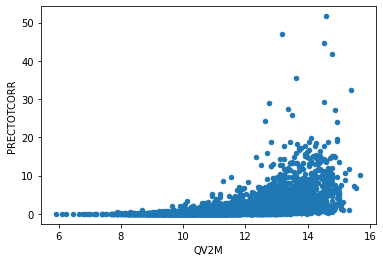

In [97]:
for i in ['WS10M', 'T2M', 'PS', 'QV2M']:
    df.plot.scatter(x=i, y='PRECTOTCORR')

In [98]:
# Drop PS columns as it is multicorrelated to the T2M column
df.drop(['PS'], axis=1)

,T2M,WS10M,PRECTOTCORR,QV2M
date,,,,
2012-01-01,19.01,3.63,0.00,7.81
2012-01-02,19.31,3.31,0.00,7.69
2012-01-03,20.82,2.73,0.00,9.16
2012-01-04,21.26,2.77,0.00,9.70
2012-01-05,21.69,2.80,0.25,9.89
...,...,...,...,...
2022-03-13,22.73,2.93,0.05,10.07
2022-03-14,23.23,2.80,0.08,10.13
2022-03-15,23.58,2.64,0.06,11.17


In [99]:
df

,T2M,PS,WS10M,PRECTOTCORR,QV2M
date,,,,,
2012-01-01,19.01,86.89,3.63,0.00,7.81
2012-01-02,19.31,86.83,3.31,0.00,7.69
2012-01-03,20.82,86.77,2.73,0.00,9.16
2012-01-04,21.26,86.70,2.77,0.00,9.70
2012-01-05,21.69,86.77,2.80,0.25,9.89
...,...,...,...,...,...
2022-03-13,22.73,86.55,2.93,0.05,10.07
2022-03-14,23.23,86.66,2.80,0.08,10.13
2022-03-15,23.58,86.65,2.64,0.06,11.17
